# Minimum Daily Temperatures Dataset

The dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

The dataset shows a strong seasonality component 

Source: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

### Dataset Import and Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


<AxesSubplot:>

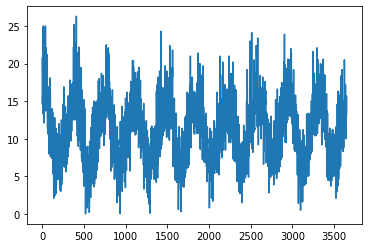

In [3]:
temp['Temp'].plot()

In [4]:
print(temp.dtypes)

Date     object
Temp    float64
dtype: object


In [5]:
temp['Date'] = pd.to_datetime(temp['Date'])

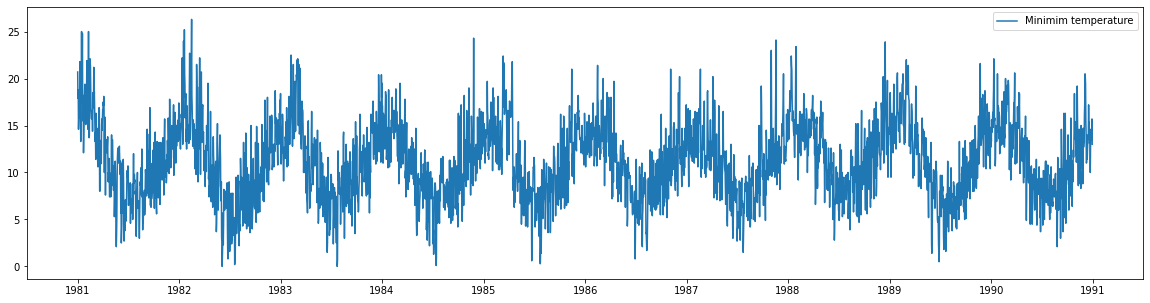

In [6]:
plt.figure(figsize =(20,5))
plt.plot(temp['Date'], temp['Temp'], label = 'Minimim temperature')
plt.legend()

In [7]:
temp['year'] = temp['Date'].dt.year
temp['month'] = temp['Date'].dt.month
#temp['weekday'] = temp['Date'].dt.weekday
#temp['MM-DD'] = temp['Date'].dt.strftime('%m-%d')

In [8]:
temp.groupby('year')['Temp'].mean()

year
1981    11.517260
1982    10.783562
1983    11.187397
1984    10.591781
1985    11.137534
1986    10.803288
1987    10.853151
1988    11.972055
1989    11.261918
1990    11.669589
Name: Temp, dtype: float64

In [9]:
temp.groupby('month')['Temp'].mean()

month
1     15.030323
2     15.373759
3     14.565484
4     12.088333
5      9.866452
6      7.278333
7      6.692581
8      7.891290
9      8.976333
10    10.309355
11    12.479667
12    13.851948
Name: Temp, dtype: float64

In [10]:
#temp.groupby('weekday')['Temp'].mean()

In [11]:
#temp.groupby('MM-DD')['Temp'].mean()

In [12]:
#Adding 5 days lag

past_days = 5

for day in range(past_days):
    d = day+1
    temp[f"temp_lag_{d}"] = temp['Temp'].shift(d)

In [13]:
temp.head(10)

,Date,Temp,year,month,temp_lag_1,temp_lag_2,temp_lag_3,temp_lag_4,temp_lag_5
0,1981-01-01,20.7,1981,1,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,17.9,1981,1,20.7,NaN,NaN,NaN,NaN
2,1981-01-03,18.8,1981,1,17.9,20.7,NaN,NaN,NaN
3,1981-01-04,14.6,1981,1,18.8,17.9,20.7,NaN,NaN
4,1981-01-05,15.8,1981,1,14.6,18.8,17.9,20.7,NaN
5,1981-01-06,15.8,1981,1,15.8,14.6,18.8,17.9,20.7
6,1981-01-07,15.8,1981,1,15.8,15.8,14.6,18.8,17.9
7,1981-01-08,17.4,1981,1,15.8,15.8,15.8,14.6,18.8
8,1981-01-09,21.8,1981,1,17.4,15.8,15.8,15.8,14.6
9,1981-01-10,20.0,1981,1,21.8,17.4,15.8,15.8,15.8


In [14]:
temp['temp_week'] = temp['Temp'].shift(1).rolling(window = 5).median()

In [15]:
temp_df = pd.get_dummies(temp, columns =['year', 'month'])
temp_df.drop('Date', axis = 1, inplace = True)
temp_df.dropna(inplace = True)
temp_df

,Temp,temp_lag_1,temp_lag_2,temp_lag_3,temp_lag_4,temp_lag_5,temp_week,year_1981,year_1982,year_1983,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
5,15.8,15.8,14.6,18.8,17.9,20.7,17.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15.8,15.8,15.8,14.6,18.8,17.9,15.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,17.4,15.8,15.8,15.8,14.6,18.8,15.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,21.8,17.4,15.8,15.8,15.8,14.6,15.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,20.0,21.8,17.4,15.8,15.8,15.8,15.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,14.0,14.6,12.9,10.0,13.9,13.2,13.2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3646,13.6,14.0,14.6,12.9,10.0,13.9,13.9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3647,13.5,13.6,14.0,14.6,12.9,10.0,13.6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3648,15.7,13.5,13.6,14.0,14.6,12.9,13.6,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting dataset into training and test sets

In [16]:
X = temp_df.drop('Temp', axis =1)
X.head()

,temp_lag_1,temp_lag_2,temp_lag_3,temp_lag_4,temp_lag_5,temp_week,year_1981,year_1982,year_1983,year_1984,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
5,15.8,14.6,18.8,17.9,20.7,17.9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15.8,15.8,14.6,18.8,17.9,15.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15.8,15.8,15.8,14.6,18.8,15.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17.4,15.8,15.8,15.8,14.6,15.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21.8,17.4,15.8,15.8,15.8,15.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y = temp_df['Temp']
y.head()

5    15.8
6    15.8
7    17.4
8    21.8
9    20.0
Name: Temp, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

**Baseline MAE:**
The baseline prediction is the yearly average temperature. We would get baseline error if we simply predicted the average temperature everyday for entire year

In [20]:
prediction = [y_train.mean()]*len(y_train)
print(f'Baseline MAE: {mean_absolute_error(y_train, prediction)}')

Baseline MAE: 3.3341656152466963


### Linear Regression

[14.3067626953125, 14.7659912109375, 9.23583984375, 10.892333984375, 13.8441162109375, 10.391357421875, 16.53515625, 7.43212890625, 14.35400390625, 15.04638671875]
[12.5, 12.1, 7.3, 11.7, 11.4, 8.2, 14.6, 10.6, 13.7, 15.7]


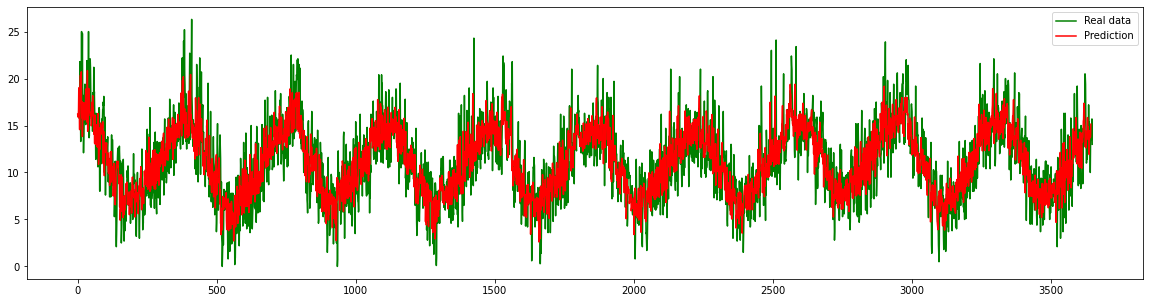

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(list(prediction[:10]))
print(list(y_test[:10]))

plt.figure(figsize =(20,5))
plt.plot(y, label = 'Real data', color= 'green')
plt.plot(model.predict(X), label = 'Prediction', color= 'red')
plt.legend()

In [22]:
mae = mean_absolute_error(y_test, prediction)
print(f"Linear Regression Test MAE = {mae}")

print(f"Linear Regression Training MAE = {mean_absolute_error(y_train, model.predict(X_train))}")

#mse =  mean_squared_error(y_test, prediction)
#print(f" MSE = {mse}")

Linear Regression Test MAE = 1.7805418501272863
Linear Regression Training MAE = 1.903573940817593


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.6627953012121413

In [24]:
pd.DataFrame(data =[model.coef_], columns = X.columns).T

,0
temp_lag_1,5.652881e-01
temp_lag_2,-1.079979e-01
temp_lag_3,2.864219e-02
temp_lag_4,1.489202e-02
temp_lag_5,4.930592e-02
temp_week,-3.555742e-02
year_1981,-9.676954e+10
year_1982,-9.676954e+10
year_1983,-9.676954e+10
year_1984,-9.676954e+10


### Ridge Regression

In [25]:
from sklearn.linear_model import Ridge

[14.294305801111568, 14.75279471992761, 9.223525335675141, 10.899197395696536, 13.827321696847912, 10.395577967918914, 16.542690044520377, 7.4421747571029835, 14.335891873318344, 15.042390740746152]
[12.5, 12.1, 7.3, 11.7, 11.4, 8.2, 14.6, 10.6, 13.7, 15.7]


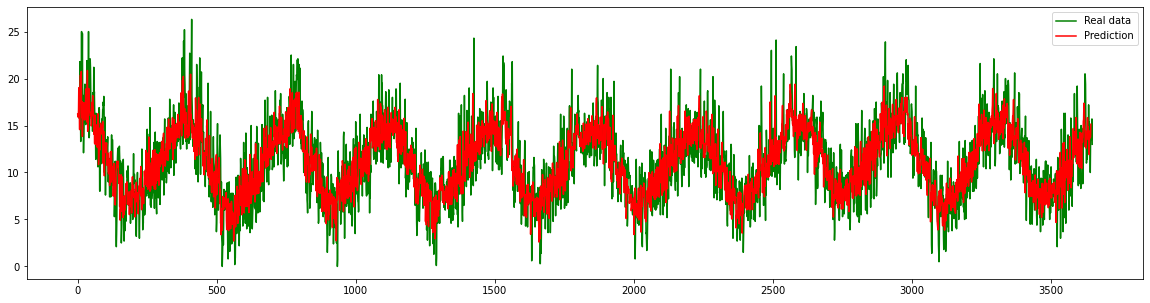

In [26]:
model = Ridge()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(list(prediction[:10]))
print(list(y_test[:10]))

plt.figure(figsize =(20,5))
plt.plot(y, label = 'Real data', color= 'green')
plt.plot(model.predict(X), label = 'Prediction', color= 'red')
plt.legend()

In [27]:
mae = mean_absolute_error(y_test, prediction)
print(f"MAE = {mae}")

mse =  mean_squared_error(y_test, prediction)
print(f"MSE = {mse}")

MAE = 1.7800333389734502
MSE = 5.158060194101281


In [28]:
pd.DataFrame(data =[model.coef_], columns = X.columns).T

,0
temp_lag_1,0.567355
temp_lag_2,-0.106860
temp_lag_3,0.029919
temp_lag_4,0.015977
temp_lag_5,0.051325
temp_week,-0.036346
year_1981,0.269703
year_1982,-0.253792
year_1983,0.069828
year_1984,-0.238330


### Lasso

In [29]:
from sklearn.linear_model import Lasso

[13.69614267451988, 13.586799924505472, 9.030009874153272, 11.028726248366675, 12.858010588284886, 10.630210830482408, 16.20866694106215, 8.423234988975015, 13.343797493507877, 14.228258468115959]
[12.5, 12.1, 7.3, 11.7, 11.4, 8.2, 14.6, 10.6, 13.7, 15.7]


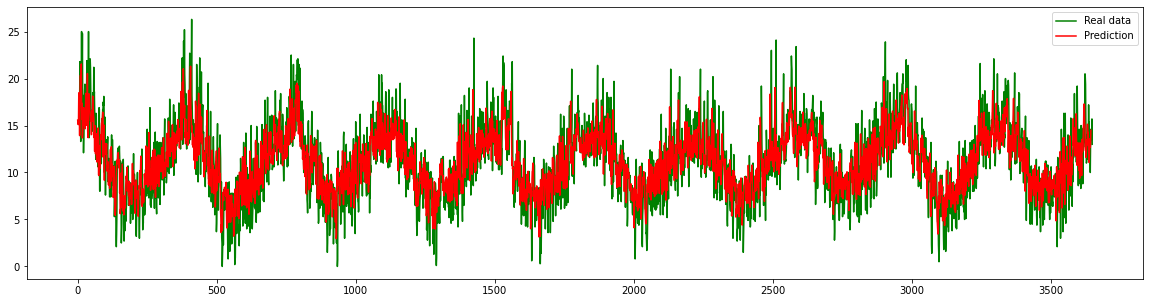

In [30]:
model = Lasso()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(list(prediction[:10]))
print(list(y_test[:10]))

plt.figure(figsize =(20,5))
plt.plot(y, label = 'Real data', color= 'green')
plt.plot(model.predict(X), label = 'Prediction', color= 'red')
plt.legend()

In [31]:
print(f"MAE = {mae}")

mse =  mean_squared_error(y_test, prediction)
print(f"MSE = {mse}")

MAE = 1.7800333389734502
MSE = 5.7272281876879685


In [32]:
pd.DataFrame(data =[model.coef_], columns = X.columns).T

,0
temp_lag_1,0.606890
temp_lag_2,0.000000
temp_lag_3,0.023598
temp_lag_4,0.055582
temp_lag_5,0.110087
temp_week,0.000000
year_1981,0.000000
year_1982,-0.000000
year_1983,0.000000
year_1984,-0.000000


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(n_estimators =100, max_depth =50, random_state =77)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(list(prediction[:10]))
print(list(y_test[:10]))

[14.618999999999996, 14.842999999999995, 9.806, 11.342, 13.692000000000007, 10.097999999999997, 15.316999999999991, 7.526, 14.109999999999998, 14.568]
[12.5, 12.1, 7.3, 11.7, 11.4, 8.2, 14.6, 10.6, 13.7, 15.7]


In [35]:
mae = mean_absolute_error(y_test, prediction)
print(f"Random Forest Test MAE = {mae}")

print(f"Random Forest Training MAE = {mean_absolute_error(y_train, model.predict(X_train))}")

#mse =  mean_squared_error(y_test, prediction)
#print(f" MSE = {mse}")

Random Forest Test MAE = 1.8360266001662509
Random Forest Training MAE = 0.7280360360360362


## Neural Network

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
model = MLPRegressor(activation ='identity', hidden_layer_sizes =(250,250,250,250), max_iter =2000, random_state = 42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(list(prediction[:10]))
print(list(y_test[:10]))

[13.309360270874512, 13.67819286530627, 8.476232576981353, 10.378525585489635, 12.794485683897896, 9.777572613678316, 15.794208276987685, 6.922242248305433, 13.165629501370573, 14.082781973062657]
[12.5, 12.1, 7.3, 11.7, 11.4, 8.2, 14.6, 10.6, 13.7, 15.7]


In [38]:
print(f"MAE = {mae}")

mse =  mean_squared_error(y_test, prediction)
print(f"MSE = {mse}")

MAE = 1.8360266001662509
MSE = 5.790889980095931


## Kernel Ridge

In [39]:
from sklearn.kernel_ridge import KernelRidge

[14.605501616369503, 14.606892066774972, 8.839725925838732, 11.246297167062112, 13.660365517161145, 10.725609165589036, 16.622750763769496, 7.5295635038639706, 14.138329609927268, 14.087763853711394]
[12.5, 12.1, 7.3, 11.7, 11.4, 8.2, 14.6, 10.6, 13.7, 15.7]


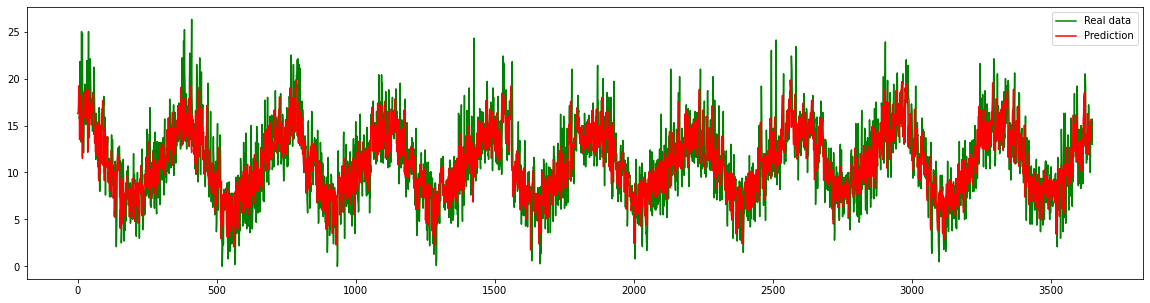

In [55]:
model = KernelRidge(alpha = 1, kernel='rbf', gamma = 0.009)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(list(prediction[:10]))
print(list(y_test[:10]))

plt.figure(figsize =(20,5))
plt.plot(y, label = 'Real data', color= 'green')
plt.plot(model.predict(X), label = 'Prediction', color= 'red')
plt.legend()

In [56]:
mae = mean_absolute_error(y_test, prediction)
print(f"Kernel Ridge Test MAE = {mae}")

print(f"Kernel Ridge Training MAE = {mean_absolute_error(y_train, model.predict(X_train))}")

#mse =  mean_squared_error(y_test, prediction)
#print(f" MSE = {mse}")

Kernel Ridge Test MAE = 1.7973525503373993
Kernel Ridge Training MAE = 1.8555829539070214
